# Session 2c: Classification

Next, we will introduce the task of classification, and look at a naive way of doing it using a method called k-Nearest Neighbors.

## Classification

Consider the following small dataset:

In [2]:
import numpy as np
from IPython.display import HTML, display
import tabulate
import matplotlib.pyplot as plt

# toy datast of whether or not it will be rainy or sunny
feature_names = ["Humidity (%)", "Pressure (kPa)"]
data = [[29, 101.7], [60, 98.6], [40, 101.1], [62, 99.9], [39, 103.2], [51, 97.6], [46, 102.1], [55, 100.2]]
labels = ["Sun","Rain","Sun","Rain","Sun","Rain","Sun","Rain"]

# display table
table_labels = np.array(['class']+feature_names).reshape((1, 1+len(feature_names)))
table_data = np.concatenate([np.array(labels).reshape(len(data), 1), data], axis=1)
table_full = np.concatenate([table_labels, table_data], axis=0)
display(HTML(tabulate.tabulate(table_full, tablefmt='html')))

class,Humidity (%),Pressure (kPa)
Sun,29.0,101.7
Rain,60.0,98.6
Sun,40.0,101.1
Rain,62.0,99.9
Sun,39.0,103.2
Rain,51.0,97.6
Sun,46.0,102.1
Rain,55.0,100.2


We can plot these points on a scatterplot. In the following, a `+` means "Rain" and a `-` is "Sun" (no rain).

![classification](http://ml4a.github.io/images/lin_classifier_2d.png)

Classification is defined as the task of predicting the correct label or category of an unknown point. With two classes, we divide the data space into two halves, one for each class. So when we receive a new point, we simply find which side of the partition the point is in.

![classification](http://ml4a.github.io/images/lin_classifier_2d_newpt.png)

## k-nearest neighbors classification

We will introduce a simple technique for classification called k-nearest neighbors classification (kNN). Before doing that, we are going to scale up our problem with a slightly more realistic dataset called [Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set), which is commonly used to introduce data science tasks.

Iris is a dataset containing 150 samples of flowers of the Iris genus, belonging to three different species (Iris setosa, Iris virginica, Iris versicolor). The dataset records their species (which is the class label), along with the following features: Petal Length, Petal Width, Sepal Length, and Sepal width. 

In the next cell, we import the dataset, and shuffle it.

In [7]:
import numpy as np
from sklearn.datasets import load_iris

# load iris and grab our data and labels
iris = load_iris()
labels, data = iris.target, iris.data

num_samples = len(labels)  # size of our dataset
num_features = len(iris.feature_names)  # number of columns/variables

# shuffle the dataset
shuffle_order = np.random.permutation(num_samples)
data = data[shuffle_order, :]
labels = labels[shuffle_order]


Let's view a table showing the first 20 samples.

In [8]:
label_names = np.array([iris.target_names[l] for l in labels])
table_labels = np.array(['class']+iris.feature_names).reshape((1, 1+num_features))
class_names = iris.target_names
table_data = np.concatenate([np.array(label_names).reshape(num_samples, 1), data], axis=1)[0:20]

# display table
table_full = np.concatenate([table_labels, table_data], axis=0)
display(HTML(tabulate.tabulate(table_full, tablefmt='html')))


class,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
setosa,4.6,3.4,1.4,0.3
setosa,5.1,3.3,1.7,0.5
virginica,6.4,2.8,5.6,2.2
virginica,6.0,2.2,5.0,1.5
virginica,6.9,3.1,5.4,2.1
versicolor,6.0,2.2,4.0,1.0
virginica,5.8,2.8,5.1,2.4
versicolor,5.6,2.5,3.9,1.1
virginica,6.4,2.8,5.6,2.1
versicolor,6.1,2.8,4.7,1.2


For simplicity, we will restrict our attention to just the first two features, sepal width and sepal length. Let's plot the dataset.

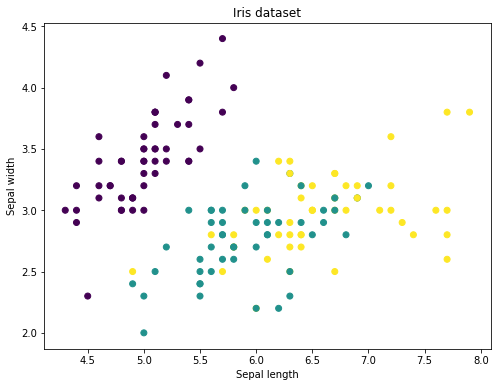

In [9]:
# plot the original data
x, y, lab = data[:, 0], data[:, 1], labels

plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=lab)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris dataset')


Suppose we are given a new point whose sepal length (`x`) and sepal width (`y`) are the following:

In [10]:
new_x, new_y = 6.5, 3.7

Let's plot it on the graph. What could its class be?

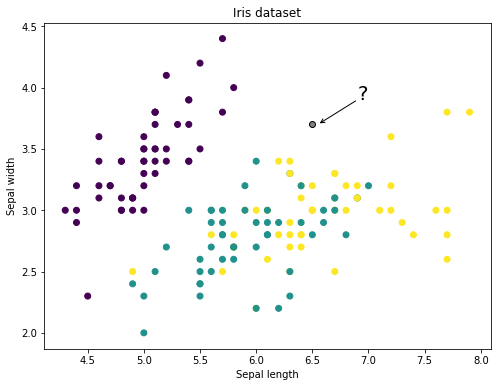

In [11]:
# plot the original data
x, y, lab = data[:, 0], data[:, 1], labels

plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=lab)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris dataset')

# put the new point on top
plt.scatter(new_x, new_y, c='grey', cmap=None, edgecolor='k')
plt.annotate('?', (new_x+0.45, new_y+0.25), fontsize=20, horizontalalignment='center', verticalalignment='center')
plt.annotate("", xytext=(new_x+0.4, new_y+0.2), xy=(new_x+0.05, new_y), arrowprops=dict(arrowstyle="->"))


Our simple approach to predicting the new point's label is to find the point in the dataset which is closest to the new point, and copying its label.

In [12]:
# calculate the distance between the new point and each of the points in our labeled dataset
distances = np.sum((data[:,0:2] - [new_x, new_y])**2, axis=1)

# find the index of the point whose distance is lowest
closest_point = np.argmin(distances)

# take its label
new_label = labels[closest_point]

print('Predicted label: %d'%new_label)

Predicted label: 2


That's it! That is k-nearest neighbors where we set `k = 1`. If `k > 1`, we find the `k` closest points and take a vote among them.

We can now plot the newly-labeled point on top of the dataset.

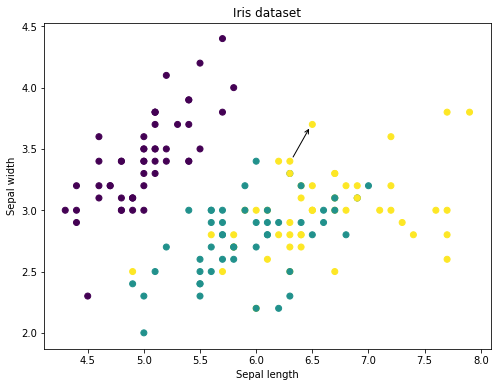

In [13]:
# append the newly labeled point in our dataset
x = np.append(x, new_x)
y = np.append(y, new_y)
lab = np.append(lab, new_label)

# scatter plot as before
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=lab)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris dataset')
plt.annotate("", xytext=(x[closest_point]+0.02, y[closest_point]+0.02), xy=(new_x-0.02, new_y-0.02), arrowprops=dict(arrowstyle="->"))


How accurate is k-nearest neighbors? We can answer this question with an experiment. Let's split the dataset into two: what we will call a "training set" and a "test set". For each point in the test set, we will find the closest point from the training set, and copy its label as our prediction for the test point. We will then compare our predictions to the actual labels in the test set, and measure our accuracy.

In [14]:
# how many samples to keep in the training set
n_train = 100

# split our dataset into training and test sets
train_data, train_labels = data[:n_train, 0:2], labels[:n_train]
test_data, test_labels = data[n_train:, 0:2], labels[n_train:]

Let's plot the reduced training set.

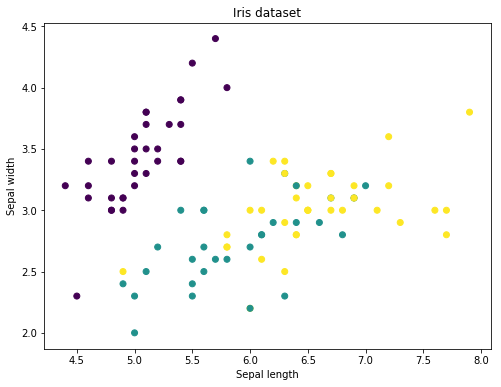

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(train_data[:,0], train_data[:,1], c=train_labels)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris dataset')

Now let's plot the unknown points on top of it. They are colored black.

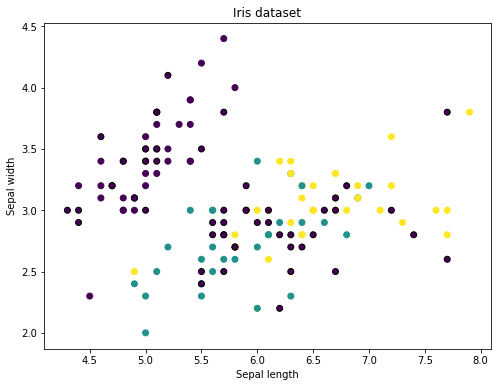

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(train_data[:,0], train_data[:,1], c=train_labels)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris dataset')
plt.scatter(test_data[:,0], test_data[:,1], c=[0]*len(test_labels), cmap=None, edgecolor='k')

Let's repeat our procedure from above, where we calculate the distances between each test point and each training point.

In [17]:
# list of each set of distances between each point in the test set and each point in the training set
distances = [ np.sum((train_data[:,0:2] - [x[0],x[1]])**2, axis=1) for x in test_data ]

# for each point in the test set, take the index in the training set of the point closest to it
closest_points = [ np.argmin(distance) for distance in distances ]

# copy the labels of those closest points as our prediction
new_labels = [train_labels[c] for c in closest_points]

How did we do?

In [18]:
results = (new_labels == test_labels)
num_correct = sum(results)
accuracy = num_correct / len(results)
print("accuracy %0.2f" % accuracy)

accuracy 0.68


Our accuracy is 68%. Not too bad for such a simple method.

Let's try it for a more complicated dataset. MNIST

Not so good. 

What are the pros and cons of nearest-neighbor search?



We will need something better: neural network.

First let's introduce regression


## Neural networks

We are now going to innovate our linear regression in a few ways and turn it into a multiple-layer neural network!

First, let's start by adding another input variable, so that now are input is two dimensions. We'll go back to the Iris dataset, and pose the following problem: given the sepal length and sepal width (first two features), try to predict the petal length (third feature).

Load the data.

In [616]:
iris = load_iris()
data, labels = iris.data[:,0:2], iris.data[:,2]

num_samples = len(labels)  # size of our dataset

# shuffle the dataset
shuffle_order = np.random.permutation(num_samples)
data = data[shuffle_order, :]
labels = labels[shuffle_order]


Like the 1-dimensional problem previously, we can still do linear regression, except now we have two variables and therefore two weights as well. We have:

$$
f(X) = w_1 x_1 + w_2 x_2 + b 
$$

There are three parameters: w1, w2, b

We can look at it:
!download (5).png

For example, suppose set $w = [0.5, 0.3]$ and $b = 0.1$. We can visualize that function.

In [674]:
def weighted_sum(x, w, b):
    return b + np.dot(w, x)


# set our paramters
w = [0.5, 0.3]
b = 0.1

# for example, let's use the first data point
X, y = data, labels

pred_y = [weighted_sum(x, w, b) for x in X]
error = mse(pred_y, y)
print(error)
#print('predicted %0.2f, actual %0.2f, mse %0.2f'%(pred_y, y, error))


333.971


Like in the previous section, we can optimize our three parameters:

equations

In [ ]:
# implement optimization and graph

We can view our prediction surface:

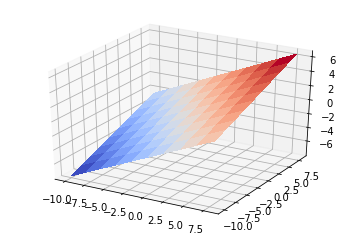

In [629]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')
x1, x2 = np.meshgrid(np.arange(-10, 10, 2), np.arange(-10, 10, 2))
y = b + w[0]*x1 + w[1]*x2
ax.plot_surface(x1, x2, y, rstride=1, cstride=1, cmap=plt.cm.coolwarm, linewidth=0, antialiased=False)


Given a dataset, we can use this setup to do linear regression, just as we did in the case of the one-dimensional dataset a few cells above. In this case, we ae no longer able to visualize the loss surface, because our function has 3 parameters (w1, w2, and b) and therefore requires four dimensions to plot the loss surface with repsect to the parameters). But the regression would work just the same way.

But this isn't good enough because it's linear. (why)

So we introduce a non-linearity. One good one is a sigmoid function.

$$
z = b + \sum_i w_i x_i \\
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Let's implement the sigmoid function, and take a look at its graph.


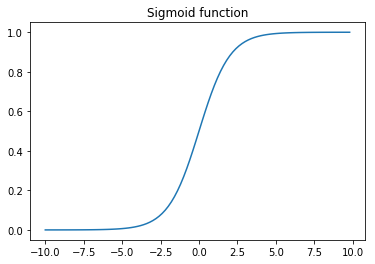

In [579]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)
plt.plot(x,sig)
plt.title('Sigmoid function')

!sigmoid

Basically it just squashes it.

we now modify our basic function in the following way: instead of just outputting $b + \sum_i w_i x_i$, we now pass that through the sigmoid function. In other words:

$$
z = w_1 x_1 + w_2 x_2 + b \\
y = \sigma(z) 
$$

In graphical terms, this looks like:

!download (6) copy.png

suppose we let

w = [0.5, 0.3]
b = 0.1


In [684]:
# reset our parameters
w = [0.5, 0.3]
b = 0.1

# let's use the first data point again
#x, y = data[0], labels[0]
X, y = data, labels

Z = [weighted_sum(x, w, b) for x in X]
y_pred = [sigmoid(z) for z in Z]
error = mse(y_pred, y)
print(error)
#print('predicted %0.2f, actual %0.2f, mse %0.2f'%(pred_y, y, error))


10.797170524615561


That migh look much worse, but we haven't optimized yet!

Given the above weights, we can take a look at the graph of our neuron's activity.

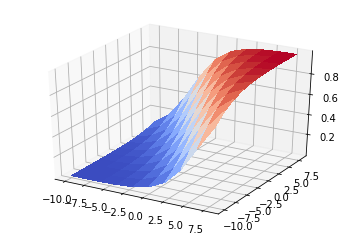

In [676]:
fig = plt.figure()
ax = fig.gca(projection='3d')
x1, x2 = np.meshgrid(np.arange(-10, 10, 2), np.arange(-10, 10, 2))
y = sigmoid(b + w[0]*x1 + w[1]*x2)
ax.plot_surface(x1, x2, y, rstride=1, cstride=1, cmap=plt.cm.coolwarm, linewidth=0, antialiased=False)


//Now let's scale this up in two ways. We will add another layer to the network, and make the input have four variabls.

Noe let's add a hidden layer.

TODO: 
figure 2x3x1

we need to create weights.

In [637]:
W1 = np.random.randn(2, 3)
W2 = np.random.randn(3, 1)

In [685]:
X, y = data, labels

Z = [np.dot(x, W1) for x in X]
Z = [sigmoid(z) for z in Z]

#print("activation in hidden layer = ", z)

y_pred = [np.dot(z, W2) for z in Z]
error = mse(y_pred, y)

print(error)
#print('predicted %0.2f, actual %0.2f, mse %0.2f'%(pred_y, y, error))


2526.1826469876382


Does it match our actual output?

We can turn this into a class.

In [686]:
class Neural_Network(object):
    def __init__(self, n0, n1, n2):        
        self.n0 = n0
        self.n1 = n1
        self.n2 = n2
        
        # initialize weights
        self.W1 = np.random.randn(self.n0, self.n1)
        self.W2 = np.random.randn(self.n1 ,self.n2)
        
    def predict(self, x):
        z = np.dot(x, self.W1)
        z = sigmoid(z)
        y = np.dot(z, self.W2)
        return y
  

Instantiate.

In [640]:
net = Neural_Network(2, 3, 1)    

In [688]:
X, y = data, labels

y_pred = net.predict(X)

error = mse(y_pred, y)

#print('predicted %0.2f, actual %0.2f, mse %0.2f'%(pred_y, y, error))
print(error)
# normalize????????
#X = X/np.amax(X, axis=0)
#y = y/100 #Max test score is 100


1938.0372810520946


## Gradient descent

how do we get the gradient? do simplest one first (newton method)

463.88065533222476


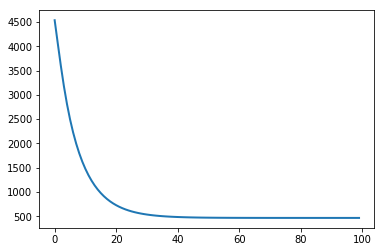

In [689]:
import itertools

def get_gradient(net, X, y):
    w_delta = 1e-8

    y_pred_current = net.predict(X)
    error_current = mse(y_pred_current, y)

    dw1, dw2 = np.zeros((net.n0, net.n1)), np.zeros((net.n1, net.n2))
    W1, W2 = np.copy(net.W1), np.copy(net.W2) 
    
    for i, j in itertools.product(range(net.n0), range(net.n1)):
        net.W1 = np.copy(W1)
        net.W1[i][j] += w_delta
        y_pred = net.predict(X)
        error = mse(y_pred, y)
        dw1[i][j] = (error - error_current) / w_delta

    for i, j in itertools.product(range(net.n1), range(net.n2)):
        net.W2 = np.copy(W2)
        net.W2[i][j] += w_delta
        y_pred = net.predict(X)
        error = mse(y_pred, y)
        dw2[i][j] = (error - error_current) / w_delta

    net.W1, net.W2 = np.copy(W1), np.copy(W2)

    return dw1, dw2


net = Neural_Network(2, 3, 1)    


X, y = data, labels


# normalize up top!

#X = X/np.amax(X, axis=0)
#y = y/np.amax(y, axis=0) #Max test score is 100


n_epochs = 100
learning_rate = 0.0001

errors = []
for i in range(n_epochs):
    dw1, dw2 = get_gradient(net, X, y)
    net.W1 = net.W1 - learning_rate * dw1
    net.W2 = net.W2 - learning_rate * dw2
    y_pred = net.predict(X)
    error = mse(y_pred, y)
    errors.append(error)
        

plt.plot(range(0, len(errors)), errors, linewidth=2)


y_pred = net.predict(X)
error = mse(y_pred, y)
print(error)


In [653]:
def sigmoid_deriv(z):
    return np.exp(-z) / ((1 + np.exp(-z))**2)


def get_gradient_2(net, X, y):
    #Compute derivative with respect to W and W2 for a given X and y:
    y_current = net.forward(X)

    delta3 = np.multiply(-(y-y_current), sigmoid_deriv(net.z3))
    #Add gradient of regularization term:
    dJdW2 = np.dot(net.a2.T, delta3) / X.shape[0]

    delta2 = np.dot(delta3, net.W2.T) * sigmoid_deriv(self.z2)
    #Add gradient of regularization term:
    dJdW1 = np.dot(X.T, delta2) / X.shape[0]
    return dJdW1, dJdW2

net = Neural_Network(2, 3, 1)    


n_epochs = 100
learning_rate = 0.1

errors = []
for i in range(n_epochs):
    dw1, dw2 = get_gradient_2(net, X, y)
    net.W1 = net.W1 - learning_rate * dw1
    net.W2 = net.W2 - learning_rate * dw2
    y_pred = net.predict(X)
    error = mse(y_pred, y)
    errors.append(error)
        

plt.plot(range(0, len(errors)), errors, linewidth=2)


NameError: name 'self' is not defined

In [ ]:
TODO softmax
classification


# introduce softmax / cross-entropy

Let's try IRIS

In [ ]:
Now let's do MNIST

it's slow

In [180]:

#import matplotlib.pyplot as plt
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.data[:, 2]
y = np.reshape(y, (len(y), 1))
X = X/np.amax(X, axis=0)
y = y/np.amax(y, axis=0)



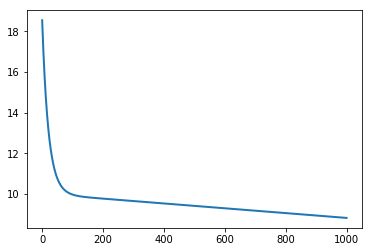

In [182]:
net = Neural_Network(2, 3, 1)    


X = X/np.amax(X, axis=0)
y = y/np.amax(y, axis=0)


n_epochs = 1000
learning_rate = 0.0001

errors = []
for i in range(n_epochs):
    dw1, dw2 = get_gradient(net, X, y)
    net.W1 = net.W1 - learning_rate * dw1
    net.W2 = net.W2 - learning_rate * dw2
    y_pred = net.predict(X)
    error = mse(y_pred, y)
    errors.append(error)
        

matplotlib.pyplot.plot(range(0, len(errors)), errors, linewidth=2)


In [195]:

#import matplotlib.pyplot as plt
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
labels = iris.target


# need to shuffle

shuffle_order = np.random.permutation(len(labels))
X = X[shuffle_order, :]
labels = labels[shuffle_order]


X = X/np.amax(X, axis=0)


In [196]:
y = np.zeros((labels.size, labels.max()+1))
y[np.arange(labels.size), labels] = 1


In [198]:
def softmax(y_pred, y_actual):
    return sum((y_actual-y_pred)**2)

# softmax
z = y_pred
z_exp = [math.exp(i) for i in z]

# categorical cross-entropy loss


n_classes = 3
net = Neural_Network(2, 3, n_classes)    


y_pred = net.predict(X)
print(y_pred)



[[-0.51250553 -2.39679166  0.47132639]
 [-0.54292477 -2.47303499  0.48257093]
 [-0.55697994 -2.50562414  0.47671609]
 [-0.54243528 -2.47390911  0.49015408]
 [-0.55213687 -2.49320486  0.47451724]
 [-0.55908867 -2.51360235  0.48657196]
 [-0.52475319 -2.42670532  0.47337532]
 [-0.5591054  -2.51077545  0.47657754]
 [-0.56853825 -2.53222927  0.47095282]
 [-0.55851974 -2.51438004  0.49412773]
 [-0.56489265 -2.52410012  0.47369404]
 [-0.56069049 -2.51390359  0.47398022]
 [-0.54406229 -2.47715577  0.48753925]
 [-0.5673997  -2.53386864  0.48595299]
 [-0.54730441 -2.48361278  0.48231971]
 [-0.52679816 -2.42900496  0.46322471]
 [-0.5659435  -2.52520093  0.46865578]
 [-0.58315287 -2.56865599  0.472252  ]
 [-0.57217905 -2.53740436  0.45834065]
 [-0.56331564 -2.5181134   0.46635092]
 [-0.52308866 -2.42336824  0.47596929]
 [-0.55432406 -2.50131154  0.48439205]
 [-0.51717542 -2.40794228  0.47115348]
 [-0.547788   -2.48270783  0.47476873]
 [-0.54766579 -2.47966852  0.46477622]
 [-0.52449637 -2.42350725

In [ ]:

def get_gradient(net, X, y):
    w_delta = 1e-8

    y_pred_current = net.predict(X)
    error_current = softmax(y_pred_current, y)

    dw1, dw2 = np.zeros((net.n0, net.n1)), np.zeros((net.n1, net.n2))
    W1, W2 = np.copy(net.W1), np.copy(net.W2) 
    
    for i, j in itertools.product(range(net.n0), range(net.n1)):
        net.W1 = np.copy(W1)
        net.W1[i][j] += w_delta
        y_pred = net.predict(X)
        error = softmax(y_pred, y)
        dw1[i][j] = (error - error_current) / w_delta

    for i, j in itertools.product(range(net.n1), range(net.n2)):
        net.W2 = np.copy(W2)
        net.W2[i][j] += w_delta
        y_pred = net.predict(X)
        error = softmax(y_pred, y)
        dw2[i][j] = (error - error_current) / w_delta

    net.W1, net.W2 = np.copy(W1), np.copy(W2)

    return dw1, dw2



n_epochs = 100
learning_rate = 0.1

errors = []
for i in range(n_epochs):
    dw1, dw2 = get_gradient(net, X, y)
    net.W1 = net.W1 - learning_rate * dw1
    net.W2 = net.W2 - learning_rate * dw2
    y_pred = net.predict(X)
    error = mse(y_pred, y)
    errors.append(error)
        

matplotlib.pyplot.plot(range(0, len(errors)), errors, linewidth=2)


In [ ]:
import numpy as np

class Neural_Network(object):
    def __init__(self, Lambda=0):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
        #Regularization Parameter:
        self.Lambda = Lambda
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(sum(self.W1**2)+sum(self.W2**2))
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        #Add gradient of regularization term:
        dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        #Add gradient of regularization term:
        dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1
        return dJdW1, dJdW2

    def costFunctionPrimeManual(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        J1 = self.costFunction(X,y)
        delta = 1e-8
        
        
        dJdW1 = np.zeros((self.inputLayerSize,self.hiddenLayerSize))
        dJdW2 = np.zeros((self.hiddenLayerSize,self.outputLayerSize))

        
        W1copy = np.copy(self.W1)
        W2copy = np.copy(self.W2)
        
        for i in range(self.inputLayerSize):
            for j in range(self.hiddenLayerSize):
                self.W1 = np.copy(W1copy)
                self.W1[i][j] += delta
                J2 = self.costFunction(X,y)
                dj2 = (J2-J1) / delta
                dJdW1[i][j] = dj2
                
        for i in range(self.hiddenLayerSize):
            for j in range(self.outputLayerSize):
                self.W2 = np.copy(W2copy)
                self.W2[i][j] += delta
                J2 = self.costFunction(X,y)
                dj2 = (J2-J1) / delta
                dJdW2[i][j] = dj2
           
        self.W1 = np.copy(W1copy)
        self.W2 = np.copy(W2copy)
        
       
        return dJdW1, dJdW2

    #Helper functions for interacting with other methods/classes
    def getParams(self):
        #Get W1 and W2 Rolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single parameter vector:
        W1_start = 0
        W1_end = self.hiddenLayerSize*self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], \
                             (self.inputLayerSize, self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], \
                             (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))
    
    

# X = (hours sleeping, hours studying), y = Score on test
X = np.array(([3,5], [5,1], [10,2]), dtype=float)
y = np.array(([75], [82], [93]), dtype=float)

# normalize
X = X/np.amax(X, axis=0)
y = y/100 #Max test score is 100


NN = Neural_Network()



learning_rate = 0.1

costs = []
for i in range(1000):
    dJdW1, dJdW2 = NN.costFunctionPrimeManual(X,y)
    NN.W1 = NN.W1 - learning_rate * dJdW1
    NN.W2 = NN.W2 - learning_rate * dJdW2
    cost3 = NN.costFunction(X, y)
    costs.append(cost3)
        

